# Training LSTM

In [5]:
from classes.Simulation import Simulation
from utils.init_functions import *
from classes.LSTM import CustomLSTM
from tqdm import tqdm

In [6]:
kwargs = dict(
    learning_rate = 0.0075,
    batch_size = 1000,
    num_epochs = 1000, 
    window_size = 30,
    hidden_number = 1, 
    hidden_size = 3,
    weight_decay = 1e-5,
    override = False,
)

In [7]:
init_functions = [
    "random_normal",
    "random_uniform",
    "truncated_normal",
    "zeros",
    "ones",
    "glorot_normal",
    "glorot_uniform",
    "identity",
    "orthogonal",
    "constant_",
    "variance_scaling",
]

i = 0

simu = {func:Simulation(**kwargs) for func in init_functions}
for func in simu:
    simu[func].make_dataloaders()
    simu[func].LSTM.init_weights(eval(func))

5it [00:01,  4.17it/s]                       


Phase    Accuracy        Recall     Precision  F1 Score   TP         TN        
Train    50.08%          52.08%     46.60%     49.19%     28303      30353     
Test     50.12%          52.10%     47.18%     49.52%     7015       7357      


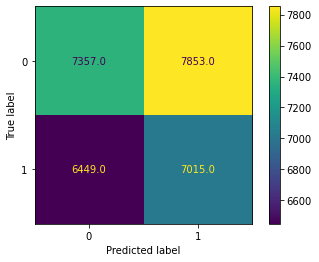

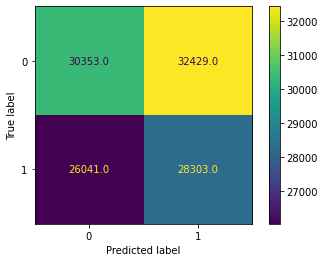

In [8]:
train_matrix, test_matrix = simu[init_functions[i]].confusion_matrix()
test_matrix.plot(values_format='')
train_matrix.plot(values_format='')

simu[init_functions[i]].classification_report()

In [9]:
for func in simu:
    simu[func].train(verbose=1)
    simu[func].LSTM.save("models/{}".format(func))
    print("Simulation {} trained.".format(func))

Train loss: 24.3302 | Test loss: 25.2361: 100%|██████████| 1000/1000 [13:43<00:00,  1.21it/s]


Simulation random_normal trained.


Train loss: 24.0457 | Test loss: 25.3996: 100%|██████████| 1000/1000 [13:41<00:00,  1.22it/s]


Simulation random_uniform trained.


Train loss: 24.1979 | Test loss: 25.9417: 100%|██████████| 1000/1000 [12:42<00:00,  1.31it/s]


Simulation truncated_normal trained.


Train loss: 24.2635 | Test loss: 25.1307: 100%|██████████| 1000/1000 [12:40<00:00,  1.32it/s]


Simulation zeros trained.


Train loss: 24.3933 | Test loss: 25.3561: 100%|██████████| 1000/1000 [13:38<00:00,  1.22it/s]


Simulation ones trained.


Train loss: 24.3324 | Test loss: 25.4075: 100%|██████████| 1000/1000 [14:08<00:00,  1.18it/s]


Simulation glorot_normal trained.


Train loss: 24.3007 | Test loss: 25.1160: 100%|██████████| 1000/1000 [14:00<00:00,  1.19it/s]


Simulation glorot_uniform trained.


Train loss: 24.3004 | Test loss: 25.4151: 100%|██████████| 1000/1000 [14:10<00:00,  1.18it/s]


Simulation identity trained.


Train loss: 24.3945 | Test loss: 25.4979: 100%|██████████| 1000/1000 [14:05<00:00,  1.18it/s]


Simulation orthogonal trained.


Train loss: 24.1803 | Test loss: 25.3110: 100%|██████████| 1000/1000 [14:04<00:00,  1.18it/s]


Simulation constant_ trained.


Train loss: 24.2794 | Test loss: 25.3944: 100%|██████████| 1000/1000 [14:15<00:00,  1.17it/s]

Simulation variance_scaling trained.


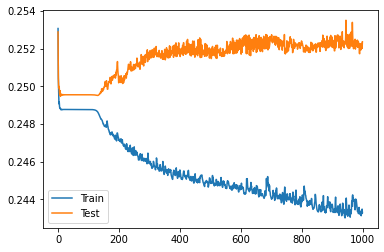

In [10]:
simu[init_functions[i]].plot_loss()

Overfitting...

5it [00:01,  2.86it/s]                       


Phase    Accuracy        Recall     Precision  F1 Score   TP         TN        
Train    56.05%          31.90%     54.52%     40.25%     17337      48317     
Test     51.41%          28.40%     47.12%     35.44%     3824       10918     


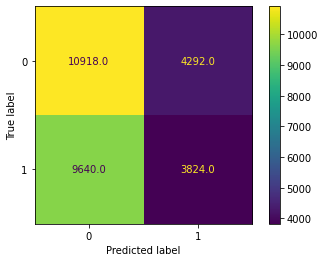

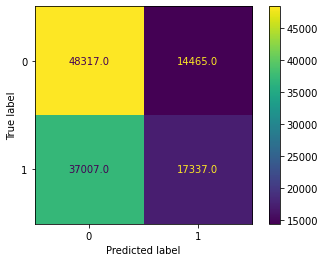

In [11]:
train_matrix, test_matrix = simu[init_functions[i]].confusion_matrix()
test_matrix.plot(values_format='')
train_matrix.plot(values_format='')

simu[init_functions[i]].classification_report()